In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print(sns.__version__)
import os 
from datetime import datetime

0.11.1


In [2]:
basedirectory = os.getcwd()
os.chdir(r"C:\Users\ivann\OneDrive\Documents\~General Assembly Documents")


In [3]:
raw_data = pd.read_csv("DSI_kickstarterscrape_dataset.csv", encoding ="latin-1")

In [4]:
raw_data.head()
#two things you shoul always do, dataset.info() and dataset.describe()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [5]:
display(raw_data.info())
display(raw_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

None

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [6]:
#Let's update the data types on our raw data
data_updated_dtype = raw_data

In [7]:
#changing the project id from an integer to a string
data_updated_dtype['project id'] = data_updated_dtype['project id'].astype('string')


#let's put the day of the week into it's own column
data_updated_dtype[['Day of Week','funded date']] = data_updated_dtype['funded date'].str.split(',',n=1,expand=True)
#let's remove the annoying zeros at the end of the each entry
data_updated_dtype['funded date']= data_updated_dtype['funded date'].str.rstrip('-0000')
data_updated_dtype['Funded Date'] = pd.to_datetime(data_updated_dtype['funded date']).dt.date
data_updated_dtype['Funded Time'] = pd.to_datetime(data_updated_dtype['funded date']).dt.time
data_updated_dtype.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration,Day of Week,Funded Date,Funded Time
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,19 Aug 2011 19:28:17,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,Fri,2011-08-19,19:28:17
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,02 Aug 2010 03:59:00,5,"$1,$5,$10,$25,$50",6,0,47.18,Mon,2010-08-02,03:59:00
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,08 Jun 2012 00:00:31,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,Fri,2012-06-08,00:00:31
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,08 Apr 2012 02:14:00,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,Sun,2012-04-08,02:14:00
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,01 Jun 2011 15:25:39,6,"$10,$25,$50,$100,$150,$250",2,0,30.00,Wed,2011-06-01,15:25:39


In [8]:
data_updated_dtype.describe()

,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [9]:
#Now let's drop the original date time column
data_updated_dtype.drop(columns = ['funded date'], inplace = True)
data_updated_dtype.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,levels,reward levels,updates,comments,duration,Day of Week,Funded Date,Funded Time
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,Fri,2011-08-19,19:28:17
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,5,"$1,$5,$10,$25,$50",6,0,47.18,Mon,2010-08-02,03:59:00
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,Fri,2012-06-08,00:00:31
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,Sun,2012-04-08,02:14:00
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,6,"$10,$25,$50,$100,$150,$250",2,0,30.00,Wed,2011-06-01,15:25:39


In [10]:
data_updated_dtype.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,levels,reward levels,updates,comments,duration,Day of Week,Funded Date,Funded Time
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,Fri,2011-08-19,19:28:17
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,5,"$1,$5,$10,$25,$50",6,0,47.18,Mon,2010-08-02,03:59:00
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,Fri,2012-06-08,00:00:31
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,Sun,2012-04-08,02:14:00
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,6,"$10,$25,$50,$100,$150,$250",2,0,30.00,Wed,2011-06-01,15:25:39


In [11]:
#Let's check to see what type of data we have
data_updated_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  string 
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  levels             45957 non-null  int64  
 12  reward levels      45898 non-null  object 
 13  updates            45957 non-null  int64  
 14  comments           45957 non-null  int64  
 15  duration           45957 non-null  float64
 16  Day of Week        459

In [12]:
data_updated_dtype.isna().any() #let's check for missing values in our updated dtype data set
#Expected output: 
# project id           False
# name                 False
# url                  False
# category             False
# subcategory          False
# location              True
# status               False
# goal                 False
# pledged               True
# funded percentage    False
# backers              False
# levels               False
# reward levels         True
# updates              False
# comments             False
# duration             False
# Day of Week          False
# Funded Date          False
# Funded Time          False
# dtype: bool

project id           False
name                 False
url                  False
category             False
subcategory          False
location              True
status               False
goal                 False
pledged               True
funded percentage    False
backers              False
levels               False
reward levels         True
updates              False
comments             False
duration             False
Day of Week          False
Funded Date          False
Funded Time          False
dtype: bool

In [13]:
#rename two word columns to be correct
data_updated_dtype["reward_levels"]=data_updated_dtype['reward levels']


In [14]:
#remove old reward levels column
data_updated_dtype.drop(columns=['reward levels'],inplace=True, axis=1)
data_updated_dtype.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,levels,updates,comments,duration,Day of Week,Funded Date,Funded Time,reward_levels
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,7,10,2,30.00,Fri,2011-08-19,19:28:17,"$25,$50,$100,$250,$500,$1,000,$2,500"
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,5,6,0,47.18,Mon,2010-08-02,03:59:00,"$1,$5,$10,$25,$50"
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,10,1,0,28.00,Fri,2012-06-08,00:00:31,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001"
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,13,4,0,32.22,Sun,2012-04-08,02:14:00,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500..."
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,6,2,0,30.00,Wed,2011-06-01,15:25:39,"$10,$25,$50,$100,$150,$250"


In [15]:
#calling the number of null values in a specific column
pledged_null = data_updated_dtype.isnull().pledged.sum()
location_null = data_updated_dtype.isnull().location.sum()
reward_null = data_updated_dtype.isnull().reward_levels.sum()
print("null location count", location_null)
print("pledged null", pledged_null)  
print ("reward levels null", reward_null)

null location count 1322
pledged null 12
reward levels null 59


In [16]:
#Let's drop any rows that are missing locations, since we have no way to determine what the Location should be from the data we have.
data_updated_dtype.dropna(subset=['location'],inplace=True)

#let's double check that we removed all the null values
location_null = data_updated_dtype.isnull().location.sum()
print("null location count", location_null)

null location count 0


In [17]:
#let's drop the rows missing reward levels since we have no way to calculate this as well.
data_updated_dtype.dropna(subset=['reward_levels'],inplace=True)

#let's double check that we removed all the null values
reward_null = data_updated_dtype.isnull().reward_levels.sum()
print ("reward levels null", reward_null)

reward levels null 0


In [18]:
#We will now attempt to update the null pldeged values using Goal amount and funded percentage
#call all rows that do not contain a pledged amount
#Let's calculate a new column called "Calculted_Pledged" and compare that with the reported pldege amounts to see if they are 
#the same.
data_updated_dtype['Calculated_Pledged']=round(data_updated_dtype['goal']*(data_updated_dtype['funded percentage']),0)
data_updated_dtype['pledgedMatch?'] = np.where(data_updated_dtype['pledged'] == data_updated_dtype['Calculated_Pledged'], 'True', 'False')  
#create new column in df1 to check if pledged amounts  match

data_updated_dtype.sample(100)


,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,levels,updates,comments,duration,Day of Week,Funded Date,Funded Time,reward_levels,Calculated_Pledged,pledgedMatch?
27813,1307729406,Uncommon Beauty: An Inspiring &amp; Educationa...,http://www.kickstarter.com/projects/800883916/...,Art,Painting,"Green Bay, WI",failed,1200.0,380.0,0.316667,...,4,2,0,60.10,Fri,2010-10-01,01:16:00,"$10,$50,$150,$500",380.0,True
14378,681847276,The Shadow out of Providence: A Lovecraftical ...,http://www.kickstarter.com/projects/98284667/t...,Publishing,Publishing,"St Louis, MO",live,7500.0,1430.0,0.190667,...,20,4,0,30.00,Sat,2012-06-23,17:22:14,"$5,$10,$15,$20,$35,$40,$45,$50,$60,$70,$85,$10...",1430.0,True
2940,138310894,Girls Gone MUSICAL,http://www.kickstarter.com/projects/ggw/girls-...,Theater,Theater,"San Francisco, CA",successful,5000.0,5451.0,1.090200,...,6,2,5,59.96,Mon,2012-05-07,21:04:05,"$25,$50,$100,$150,$200,$500",5451.0,True
23183,1088753329,Vote for the Second Vicious Crucible!,http://www.kickstarter.com/projects/viciouscru...,Games,Games,"North Hollywood, CA",live,2000.0,2012.0,1.006000,...,8,8,1,25.30,Mon,2012-06-04,06:59:00,"$5,$15,$30,$50,$60,$80,$200,$500",2012.0,True
44415,2084094461,cARTel: Collaborative Arts LA,http://www.kickstarter.com/projects/48319990/c...,Art,Mixed Media,"Los Angeles, CA",failed,5000.0,140.0,0.028000,...,4,0,0,50.00,Mon,2011-06-06,23:59:00,"$5,$10,$25,$60",140.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45947,2147049744,The Velvet Painting Series,http://www.kickstarter.com/projects/jirard/the...,Photography,Photography,"Dallas, TX",failed,25000.0,1614.0,0.064560,...,12,0,3,37.00,Fri,2011-12-16,04:00:00,"$1,$5,$10,$25,$50,$100,$150,$200,$500,$1,000,$...",1614.0,True
35355,1664105531,Join Cliff Hillis in releasing his next record!,http://www.kickstarter.com/projects/1040528626...,Music,Indie Rock,"Phoenixville, PA",successful,2750.0,7632.0,2.775273,...,9,9,22,32.53,Thu,2012-04-05,03:59:00,"$10,$20,$25,$50,$75,$150,$250,$400,$600",7632.0,True
20406,959415967,Imperial Crusade Freedom: Another Unique Space...,http://www.kickstarter.com/projects/139696320/...,Games,Board &amp; Card Games,"Fountain Valley, CA",successful,4000.0,4589.0,1.147250,...,2,6,54,40.00,Wed,2012-05-09,20:44:48,"$20,$35",4589.0,True
43527,2041891901,Jazz: The New American Experience,http://www.kickstarter.com/projects/487041259/...,Film &amp; Video,Documentary,"New Haven, CT",failed,25000.0,100.0,0.004000,...,11,1,0,28.32,Wed,2012-02-01,04:11:00,"$5,$10,$25,$50,$100,$250,$500,$750,$1,000,$5,0...",100.0,True


In [19]:
#Let's add in the pldged amount where appropiate in our dataset
nullpledged_df = data_updated_dtype[data_updated_dtype.isnull().pledged]
nullpledged_df.head(20) #there should only be 12 rows in the pledged null data frame
# data_updated_dtype['pledged']=round(nullpledged_df['goal']*(nullpledged_df['funded percentage']),0)
# pledged_null = data_updated_dtype.isnull().pledged.sum()
# print("pledged null", pledged_null)  



,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,levels,updates,comments,duration,Day of Week,Funded Date,Funded Time,reward_levels,Calculated_Pledged,pledgedMatch?
1187,55442017,Xenonauts,http://www.kickstarter.com/projects/69341191/x...,Games,Video Games,"London, United Kingdom",live,50000.0,NaN,2.219487,...,17,8,562,33.00,Sun,2012-06-10,23:19:04,"$20,$30,$50,$50,$50,$60,$75,$85,$100,$100,$125...",110974.0,False
4502,213683990,Twokinds Book Printing Drive,http://www.kickstarter.com/projects/twokinds/t...,Comics,Comics,"Cincinnati, OH",live,25000.0,NaN,6.303783,...,34,6,1133,31.24,Sat,2012-06-09,20:00:00,"$10,$12,$15,$20,$20,$20,$20,$25,$25,$35,$35,$4...",157595.0,False
13381,636029584,HICKIES - TURN YOUR KICKS INTO SLIP-ONS,http://www.kickstarter.com/projects/hickies/hi...,Design,Product Design,"Brooklyn, NY",live,25000.0,NaN,4.907843,...,9,6,119,45.00,Thu,2012-06-14,15:44:14,"$16,$30,$45,$59,$75,$90,$115,$300,$500",122696.0,False
13802,656206605,Genie - Motion control time lapse device,http://www.kickstarter.com/projects/syrp/genie...,Design,Product Design,"Queenstown, New Zealand",live,150000.0,NaN,2.999618,...,13,10,89,60.00,Tue,2012-06-26,06:29:41,"$1,$15,$30,$50,$100,$590,$690,$750,$790,$3,000...",449943.0,False
25239,1184761342,B9Creator - A High Resolution 3D Printer,http://www.kickstarter.com/projects/b9creation...,Technology,Open Hardware,"Deadwood, SD",live,50000.0,NaN,4.761380,...,11,12,100,33.07,Tue,2012-06-12,07:00:00,"$5,$25,$59,$99,$132,$183,$216,$2,375,$2,675,$3...",238069.0,False
29412,1382865280,Phil Tippett's &quot;MAD GOD&quot;,http://www.kickstarter.com/projects/madgod/phi...,Film &amp; Video,Animation,"Berkeley, CA",live,40000.0,NaN,2.532484,...,10,3,59,30.00,Sat,2012-06-16,22:36:31,"$10,$25,$55,$75,$100,$115,$300,$1,800,$3,600,$...",101299.0,False
31164,1467412732,gTar: The First Guitar That Anybody Can Play,http://www.kickstarter.com/projects/incident/g...,Technology,Technology,"Santa Clara, CA",live,100000.0,NaN,2.846420,...,11,4,44,35.00,Mon,2012-06-25,17:26:04,"$1,$25,$350,$399,$450,$499,$599,$699,$799,$999...",284642.0,False
34274,1612550316,Space Command,http://www.kickstarter.com/projects/58936338/s...,Film &amp; Video,Film &amp; Video,"Studio City, CA",live,75000.0,NaN,1.796187,...,22,24,279,60.00,Sun,2012-07-15,03:59:00,"$5,$8,$12,$17,$27,$37,$50,$67,$107,$257,$357,$...",134714.0,False
35032,1648656751,BronyCon: The Documentary,http://www.kickstarter.com/projects/257527888/...,Film &amp; Video,Documentary,"Los Angeles, CA",live,60000.0,NaN,3.148185,...,15,5,525,26.97,Sun,2012-06-10,18:59:00,"$10,$10,$30,$50,$75,$100,$150,$250,$500,$500,$...",188891.0,False
40759,1911111579,Two Guys SpaceVenture - by the creators of Spa...,http://www.kickstarter.com/projects/spaceventu...,Games,Video Games,"Eugene, OR",live,500000.0,NaN,0.583738,...,33,30,6895,35.00,Tue,2012-06-12,17:27:38,"$15,$30,$31,$45,$50,$60,$75,$100,$100,$101,$11...",291869.0,False


In [20]:
#Let's attempt to fill in the values for this temporary data frame
#the following code snippet was me testing how to use the np.where function, which essentialy acts like an if-then function.
#The function worked the way that I hoped it would
# nullpledged_df['pledged'] = np.where(nullpledged_df['pledged'].isnull(),round(nullpledged_df['goal']*(nullpledged_df['funded percentage']),0),nullpledged_df['pledged'])
# nullpledged_df.head(12)


In [21]:
#Use the numpy "where" function to replace NAN values in the data set with by calculating pledged amount from fundraising goal * pledged percentage.
data_updated_dtype['pledged'] = np.where(data_updated_dtype['pledged'].isnull(),round(data_updated_dtype['goal']*(data_updated_dtype['funded percentage']),0),data_updated_dtype['pledged'])
pledged_null = data_updated_dtype.isnull().pledged.sum()
#the expected output is 0. 
print("pledged null", pledged_null) 

pledged null 0


In [22]:
#create a new dataset to be used for further data cleaning
#We need to drop the extra columns we created, i.e. pledgedmatch? and calculated pledge
data_updated_dtype.drop(columns= ['Calculated_Pledged','pledgedMatch?'], inplace=True)
no_nulls_data= data_updated_dtype
no_nulls_data.head()



,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,levels,updates,comments,duration,Day of Week,Funded Date,Funded Time,reward_levels
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,7,10,2,30.00,Fri,2011-08-19,19:28:17,"$25,$50,$100,$250,$500,$1,000,$2,500"
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,5,6,0,47.18,Mon,2010-08-02,03:59:00,"$1,$5,$10,$25,$50"
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,10,1,0,28.00,Fri,2012-06-08,00:00:31,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001"
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,13,4,0,32.22,Sun,2012-04-08,02:14:00,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500..."
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,6,2,0,30.00,Wed,2011-06-01,15:25:39,"$10,$25,$50,$100,$150,$250"


In [23]:
#Next Step: Let's make sure all categories are unique and consistent
print(no_nulls_data.category.unique())
print(no_nulls_data.groupby(['category'])['category'].count())
#From our output, we see that Film & Video is written two ways, Film & Video + Film &amp; Video
#The total expected amount of listings that fall in the Film & video category is 13,082
#Expected output
# category
    # Art                  3872
    # Comics               1034
    # Dance                 744
    # Design               1738
    # Fashion              1117
    # Film & Video          482
    # Film &amp; Video    12600
    # Food                 1411
    # Games                1689
    # Music               10671
    # Photography          1424
    # Publishing           4585
    # Technology            774
    # Theater              2451

['Film & Video' 'Games' 'Fashion' 'Music' 'Art' 'Dance' 'Publishing'
 'Theater' 'Comics' 'Technology' 'Design' 'Photography' 'Food'
 'Film &amp; Video']
category
Art                  3872
Comics               1034
Dance                 744
Design               1738
Fashion              1117
Film & Video          482
Film &amp; Video    12600
Food                 1411
Games                1689
Music               10671
Photography          1424
Publishing           4585
Technology            774
Theater              2451
Name: category, dtype: int64


In [24]:
#Relace all instances of Film &amp; Video with Film & Video
no_nulls_data['category'] = np.where(no_nulls_data['category'] =='Film &amp; Video','Film & Video',no_nulls_data['category'])
print(no_nulls_data.groupby(['category'])['category'])


In [25]:
#let's identify the unique values of our subcategories
# print(no_nulls_data.subcategory.unique())
print(no_nulls_data.groupby(['subcategory'])['subcategory'].count())
# print(no_nulls_data.loc[no_nulls_data['subcategory'] == 'Board & Card Games'].count())


subcategory
Animation                  407
Art                       1037
Art Book                   333
Board & Card Games         110
Board &amp; Card Games     432
Children's Book            640
Classical Music            470
Comics                    1034
Conceptual Art             168
Country & Folk             249
Country &amp; Folk         777
Crafts                     247
Dance                      744
Design                     281
Digital Art                139
Documentary               3798
Electronic Music           298
Fashion                   1117
Fiction                   1057
Film &amp; Video          2432
Food                      1411
Games                      267
Graphic Design             171
Hip-Hop                    467
Illustration               195
Indie Rock                1880
Jazz                       431
Journalism                 381
Mixed Media                443
Music                     3187
Narrative Film            1510
Nonfiction                1

In [26]:
#Let's redefine Board &amp; Card Games,  Country &amp; Folk  ,  Film &amp; Video
no_nulls_data['subcategory'] = np.where(no_nulls_data['subcategory'] =='Film &amp; Video','Film & Video',no_nulls_data['subcategory'])
no_nulls_data['subcategory'] = np.where(no_nulls_data['subcategory'] =='Country &amp; Folk','Country & Folk',no_nulls_data['subcategory'])
no_nulls_data['subcategory'] = np.where(no_nulls_data['subcategory'] =='Board &amp; Card Games','Board & Card Games',no_nulls_data['subcategory'])

# for item  in no_nulls_data['subcategory']:
#     if (item == 'Film &amp; Video'):
#         no_nulls_data['subcategory'][item]= ('Film & Video')
#     else:
#         item = item
    
# no_nulls_data.shape
#In order to iterate over an index I need to reindex my code.
no_nulls_data.reset_index(drop=True, inplace= True)
no_nulls_data.head(20)
# print(no_nulls_data['subcategory'][0]);
# print(no_nulls_data['subcategory'][11]);
# i = 0;
# for i in range(len(no_nulls_data['subcategory'])):
# #     print(no_nulls_data['category'][i])
#     if no_nulls_data['subcategory'][i] == 'Film &amp; Video':
#         no_nulls_data['subcategory'][i] ="Film & Video"
#     elif no_nulls_data['subcategory'][i] == 'Board &amp; Card Games':
#         no_nulls_data['subcategory'][i] = "Board & Card Games"
#     elif no_nulls_data['subcategory'][i] == 'Country &amp; Folk':
#         no_nulls_data['subcategory'][i] ="Country & Folk"
# no_nulls_data.column = df.column.apply(<urstuff>)
    
        
        
#     if no_nulls_data['subcategory'][i] == 'Film &amp; Video':
#         no_nulls_data['subcategory'][i] = "Film & video"
#     else:
#         no_nulls_data['subcategory'][i] = no_nulls_data['subcategory'][i]
# no_nulls_data.head(20)
#Print statement to make sure everything was renamed properly
#print(no_nulls_data.subcategory.unique())
no_nulls_data.head()




,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,levels,updates,comments,duration,Day of Week,Funded Date,Funded Time,reward_levels
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,7,10,2,30.00,Fri,2011-08-19,19:28:17,"$25,$50,$100,$250,$500,$1,000,$2,500"
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,5,6,0,47.18,Mon,2010-08-02,03:59:00,"$1,$5,$10,$25,$50"
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,10,1,0,28.00,Fri,2012-06-08,00:00:31,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001"
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,13,4,0,32.22,Sun,2012-04-08,02:14:00,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500..."
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,6,2,0,30.00,Wed,2011-06-01,15:25:39,"$10,$25,$50,$100,$150,$250"


In [27]:
#Let's remove extra columns if possible
# print(no_nulls_data['pledgedMatch?'].is())
# print(no_nulls_data['goal'].count())

In [28]:
#Rename no_null_data to the final dataset since everything is finally cleaned
#Convert the the decimal repesentation of funded percentage to actually correspond with the percentage
no_nulls_data['funded percentage']= no_nulls_data['funded percentage'].apply(lambda x: x*100)
final_data=no_nulls_data

In [29]:
#Let's describe our data set 
round(final_data.describe(),2)
#             goal   	pledged  	funded percentage	backers 	levels  	updates 	comments	duration
# count	4.459200e+04	4.459200e+04	44592.000	44592.000  	44592.000	44592.000	44592.000	44592.000
# mean	1.210894e+04	5.104144e+03	165.889 	71.038  	8.047	4.069	8.526	39.628
# std	1.916062e+05	5.769624e+04	7634.553	698.999  	4.247	6.404	176.651	17.087
# min	5.000000e-01	0.000000e+00	0.000   	0.000   	1.000	0.000	0.000	1.000
# 25%	1.800000e+03	2.000000e+02	4.500   	5.000   	5.000	0.000	0.000	30.000
# 50%	4.000000e+03	1.326000e+03	100.000 	23.000  	8.000	2.000	0.000	31.605
# 75%	1.000000e+04	4.205000e+03	111.667 	60.000  	10.000	6.000	3.000	47.020
# max	2.147484e+07	1.026684e+07	1506600.000	87142.000	80.000	149.000	19311.000	91.960

,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,44592.00,44592.00,44592.00,44592.00,44592.00,44592.00,44592.00,44592.00
mean,12108.94,5104.14,165.89,71.04,8.05,4.07,8.53,39.63
std,191606.24,57696.23,7634.55,699.00,4.25,6.40,176.65,17.09
min,0.50,0.00,0.00,0.00,1.00,0.00,0.00,1.00
25%,1800.00,200.00,4.50,5.00,5.00,0.00,0.00,30.00
50%,4000.00,1326.00,100.00,23.00,8.00,2.00,0.00,31.60
75%,10000.00,4205.00,111.67,60.00,10.00,6.00,3.00,47.02
max,21474836.47,10266845.00,1506600.00,87142.00,80.00,149.00,19311.00,91.96


Percentage of campaigns with no updates 0.35


<AxesSubplot:xlabel='updates', ylabel='Count'>

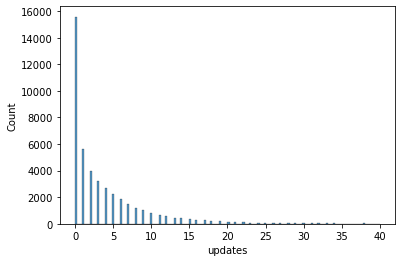

In [30]:
#Let's start plotting our data to understand what is going on!

#Let's try some basic analysis, how do # of updates affect funding percentage. Let's color code it by category for fun
print("Percentage of campaigns with no updates" + ' '+ 
      str(round(final_data.loc[final_data['updates'] ==0, ['updates']].count()[0] 
        #this counts all the situations where updates are = 0, #the [0] at the end is because the original output is a 1x1 array and I only need a single value
      /final_data.updates.count(),2)))
sns.histplot(final_data["updates"], binrange= [0, 40])
#Turns out that a vast majority of the 

In [31]:
#Lets look at a histogram for each coloumn shall we
print(final_data.groupby(['goal']).goal.count())
# sns.histplot(final_data["goal"])


goal
0.50            1
1.00           30
1.85            1
2.00            1
3.00            2
               ..
5250000.00      1
15000000.00     1
20000000.00     1
21474836.00     1
21474836.47     1
Name: goal, Length: 1794, dtype: int64


<AxesSubplot:xlabel='pledged', ylabel='Count'>

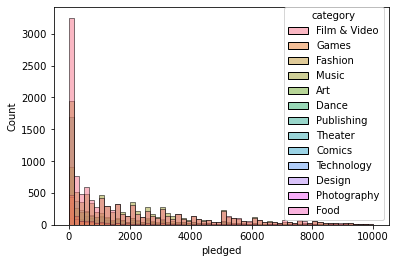

In [32]:
figsize = (15,10)
sns.histplot(data=final_data,x = 'pledged', binrange= [0, 10000], hue= 'category')


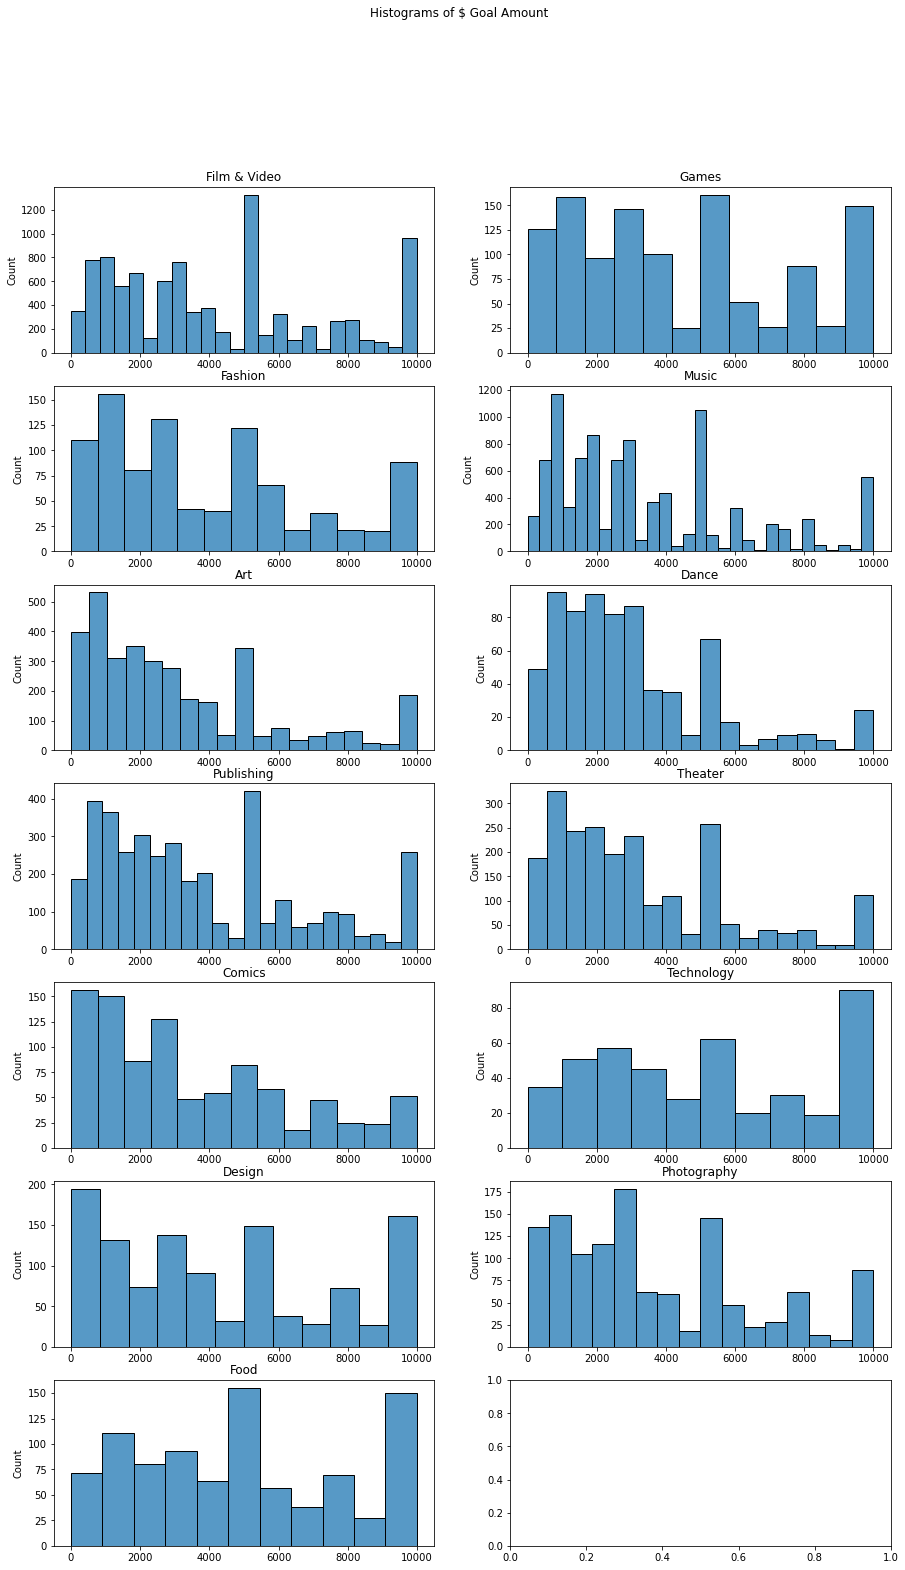

In [33]:
#Let's do histogram plots for every quant column
#Let's map out the histogram for all the categories and what they raised
num_catergories= final_data.category.nunique()
# print(num_catergories)
category_list = final_data.category.unique() #list of categories
fig, axs = plt.subplots(7,2,figsize= (15,25))
fig.suptitle('Histograms of $ Goal Amount')

row_counter = 0
col_counter = 0
#figure out why your key for Film& Video isn't working!
# print(final_data.loc[final_data['category']== 'Games',['goal']])


#This cell plots all the histograms of all the different categories. We can now repeate this process for any other metric we are interested in

for index in category_list:
    sns.histplot(final_data.loc[final_data['category']== index,['goal']], binrange= [0, 10000], ax= axs[row_counter,col_counter], legend=False)
    axs[row_counter,col_counter].set_title(index)
    col_counter += 1
    
    if col_counter == 2:
        col_counter = 0
        if row_counter <= 5:
            row_counter +=1
    




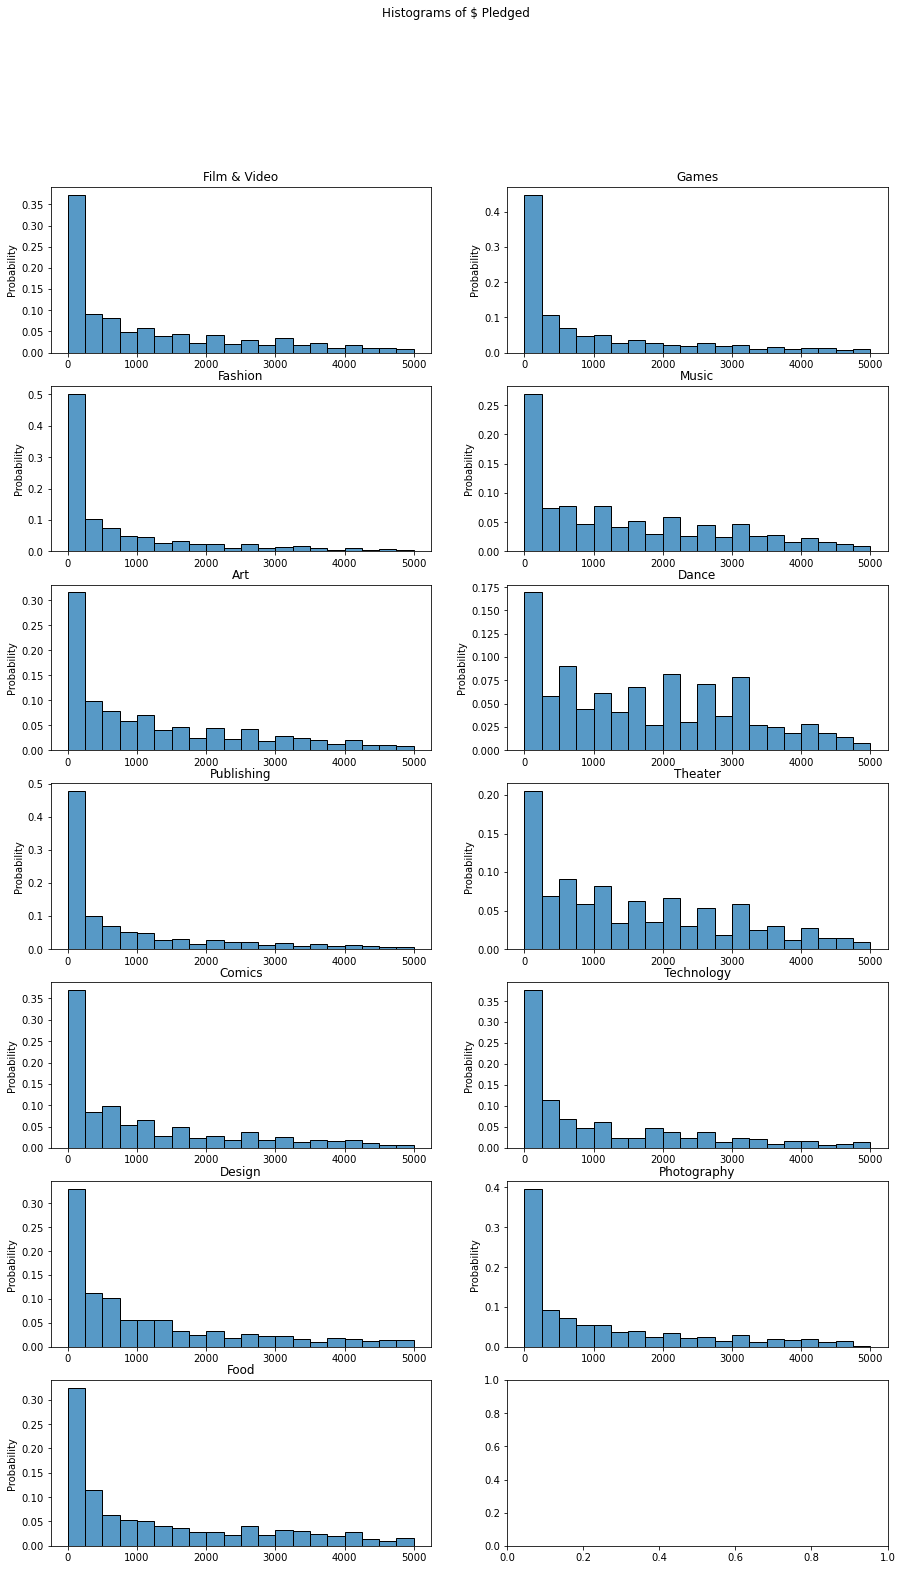

In [34]:
category_list = final_data.category.unique() #list of categories
#After looking at some initial plotting, I realized that sharing the y-axis would be a bad idea
fig, axs = plt.subplots(7,2,figsize= (15,25))
fig.suptitle('Histograms of $ Pledged')
row_counter = 0
col_counter = 0


for index in category_list:
    sns.histplot(final_data.loc[final_data['category']== index,['pledged']],bins= 20, ax= axs[row_counter,col_counter], binrange= [0, 5000],legend=False, stat='probability')
    axs[row_counter,col_counter].set_title(index)
    col_counter += 1
    
    if col_counter == 2:
        col_counter = 0
        if row_counter <= 5:
            row_counter +=1
            
# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

(0.0, 100000.0)

<Figure size 432x288 with 0 Axes>

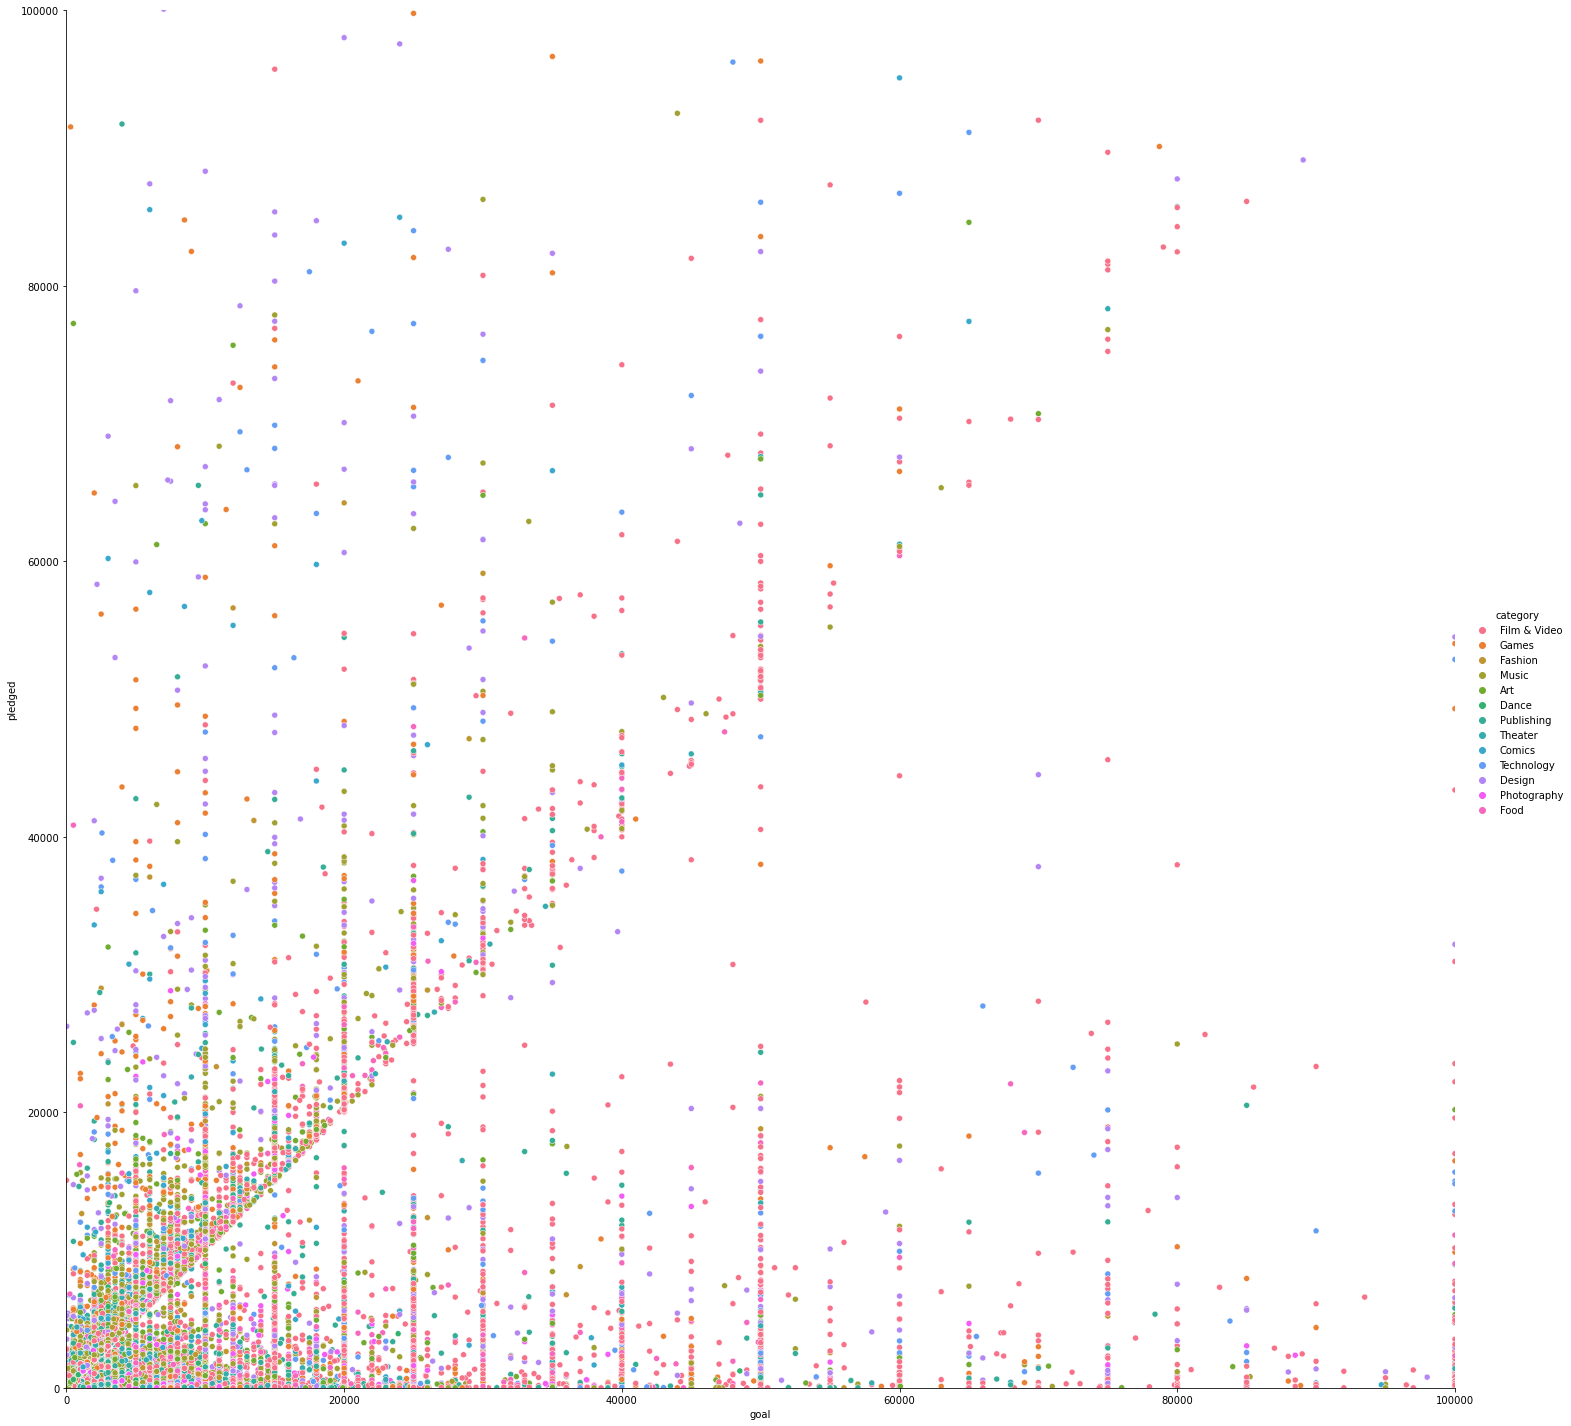

In [35]:
#Let's create overlapping histograms of amount pledged vs. amount raised. Maybe a scatter plot would be better?
# fig = plt.gcf()

# Change seaborn plot size
# fig.set_size_inches(20, 20)
# fig, axs = plt.subplots(1,5,figsize= (15,25))
plt.clf()
# ongoing_data = 
sns.relplot(x= 'goal', y='pledged', hue='category', data= final_data, height = 20)
# control x and y limits
plt.ylim(0, 100000)
plt.xlim(0, 100000)



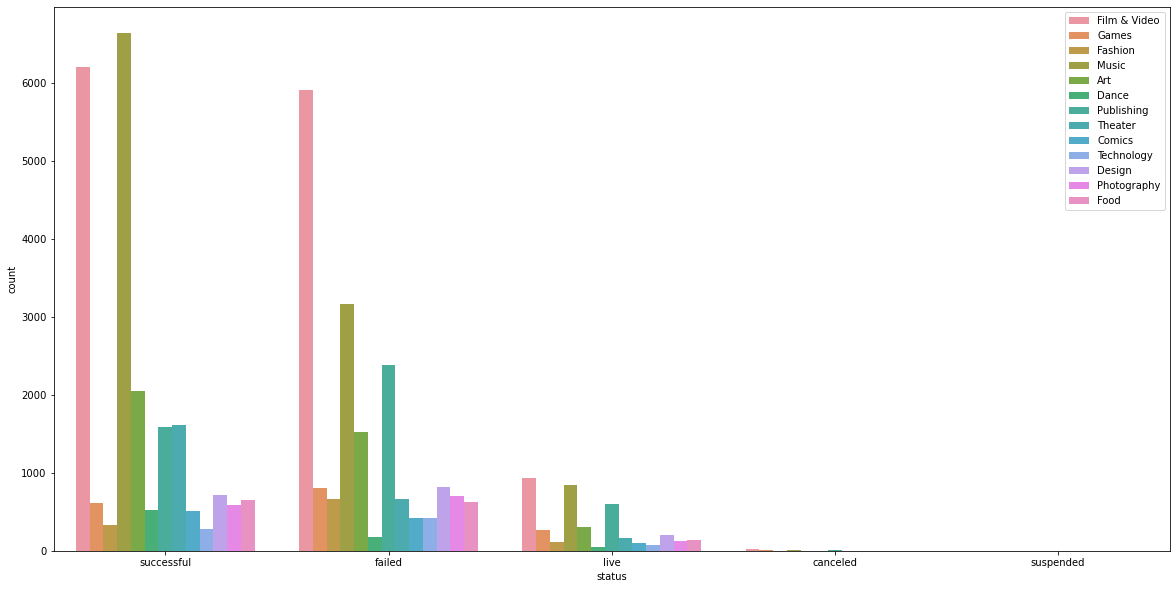

In [36]:
#Let's look at which category was the most sucessful

plt.figure(figsize=(20,10))
ax = sns.countplot(x="status", hue="category", data=final_data)
plt.legend(loc='upper right')

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [38]:
final_data['status'].unique()
final_data
#let's remove the rows that have live, cancelled, or suspended

# get names of indexes for which 



,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,levels,updates,comments,duration,Day of Week,Funded Date,Funded Time,reward_levels
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,109.952381,66,7,10,2,30.00,Fri,2011-08-19,19:28:17,"$25,$50,$100,$250,$500,$1,000,$2,500"
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.500000,2,5,6,0,47.18,Mon,2010-08-02,03:59:00,"$1,$5,$10,$25,$50"
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.280000,3,10,1,0,28.00,Fri,2012-06-08,00:00:31,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001"
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,108.916667,100,13,4,0,32.22,Sun,2012-04-08,02:14:00,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500..."
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,6,2,0,30.00,Wed,2011-06-01,15:25:39,"$10,$25,$50,$100,$150,$250"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44587,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500.0,601.0,120.200000,13,3,2,0,37.83,Fri,2012-03-30,13:57:00,"$20,$50,$100"
44588,2147346811,new album from J-Sw!ft The Adventures of Negro...,http://www.kickstarter.com/projects/170926480/...,Music,Hip-Hop,"Los Angeles, CA",failed,10000.0,75.0,0.750000,2,14,1,1,59.96,Sun,2012-04-22,02:12:10,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,..."
44589,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.0,100.000000,58,4,2,0,27.32,Mon,2012-01-16,05:00:00,"$10,$25,$100,$500"
44590,2147369705,Dragon Keepers IV Book Project,http://www.kickstarter.com/projects/brucegoldw...,Publishing,Fiction,"Vero Beach, FL",failed,2999.0,257.0,8.569523,11,7,17,0,30.00,Sat,2012-05-19,19:44:47,"$15,$16,$19,$29,$29,$39,$75"


In [39]:
index_names = final_data[(final_data['status'] == "live") | (final_data['status'] == 'canceled') | (final_data['status'] == 'suspended')].index 
  
# drop these given row 
# indexes from dataFrame 
final_data.drop(index_names, inplace = True) 
final_data.reset_index(inplace=True, drop=True)

final_data
# final_data['status'].unique()
#Remove the rows that are not failed or successfull

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,levels,updates,comments,duration,Day of Week,Funded Date,Funded Time,reward_levels
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,109.952381,66,7,10,2,30.00,Fri,2011-08-19,19:28:17,"$25,$50,$100,$250,$500,$1,000,$2,500"
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.500000,2,5,6,0,47.18,Mon,2010-08-02,03:59:00,"$1,$5,$10,$25,$50"
2,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,108.916667,100,13,4,0,32.22,Sun,2012-04-08,02:14:00,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500..."
3,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,6,2,0,30.00,Wed,2011-06-01,15:25:39,"$10,$25,$50,$100,$150,$250"
4,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,102.333143,39,7,8,0,21.43,Wed,2011-06-22,13:33:00,"$5,$25,$50,$100,$250,$500,$1,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40595,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500.0,601.0,120.200000,13,3,2,0,37.83,Fri,2012-03-30,13:57:00,"$20,$50,$100"
40596,2147346811,new album from J-Sw!ft The Adventures of Negro...,http://www.kickstarter.com/projects/170926480/...,Music,Hip-Hop,"Los Angeles, CA",failed,10000.0,75.0,0.750000,2,14,1,1,59.96,Sun,2012-04-22,02:12:10,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,..."
40597,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.0,100.000000,58,4,2,0,27.32,Mon,2012-01-16,05:00:00,"$10,$25,$100,$500"
40598,2147369705,Dragon Keepers IV Book Project,http://www.kickstarter.com/projects/brucegoldw...,Publishing,Fiction,"Vero Beach, FL",failed,2999.0,257.0,8.569523,11,7,17,0,30.00,Sat,2012-05-19,19:44:47,"$15,$16,$19,$29,$29,$39,$75"


<AxesSubplot:xlabel='status', ylabel='count'>

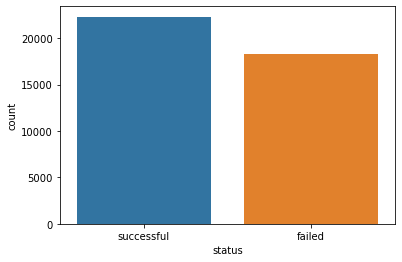

In [40]:
#make sure the value we are trying to calculate is binary
sns.countplot(x = 'status', data = final_data)
#check, each item is either successful or failed


In [41]:
#let's drop the reward levels column and the location column to make things easier for us.
#we are removing project name because I currently have no way to quanitify how good or bad a project name when read by the audience, therefore, making it impossible for me to currently estimate it's impact.
logreg_data = final_data.drop(columns=['location','reward_levels','url','project id','name'])
logreg_data

,category,subcategory,status,goal,pledged,funded percentage,backers,levels,updates,comments,duration,Day of Week,Funded Date,Funded Time
0,Film & Video,Short Film,successful,10500.0,11545.0,109.952381,66,7,10,2,30.00,Fri,2011-08-19,19:28:17
1,Games,Board & Card Games,failed,4000.0,20.0,0.500000,2,5,6,0,47.18,Mon,2010-08-02,03:59:00
2,Film & Video,Documentary,successful,6000.0,6535.0,108.916667,100,13,4,0,32.22,Sun,2012-04-08,02:14:00
3,Fashion,Fashion,failed,3500.0,0.0,0.000000,0,6,2,0,30.00,Wed,2011-06-01,15:25:39
4,Film & Video,Short Film,successful,3500.0,3582.0,102.333143,39,7,8,0,21.43,Wed,2011-06-22,13:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40595,Dance,Dance,successful,500.0,601.0,120.200000,13,3,2,0,37.83,Fri,2012-03-30,13:57:00
40596,Music,Hip-Hop,failed,10000.0,75.0,0.750000,2,14,1,1,59.96,Sun,2012-04-22,02:12:10
40597,Music,Rock,successful,10000.0,10000.0,100.000000,58,4,2,0,27.32,Mon,2012-01-16,05:00:00
40598,Publishing,Fiction,failed,2999.0,257.0,8.569523,11,7,17,0,30.00,Sat,2012-05-19,19:44:47


In [42]:
#I am also removing funding percentage and pledged ammounts because they highly correlate with whether or not something was successful
logreg_data = logreg_data.drop(columns=['funded percentage', 'pledged'])
logreg_data

,category,subcategory,status,goal,backers,levels,updates,comments,duration,Day of Week,Funded Date,Funded Time
0,Film & Video,Short Film,successful,10500.0,66,7,10,2,30.00,Fri,2011-08-19,19:28:17
1,Games,Board & Card Games,failed,4000.0,2,5,6,0,47.18,Mon,2010-08-02,03:59:00
2,Film & Video,Documentary,successful,6000.0,100,13,4,0,32.22,Sun,2012-04-08,02:14:00
3,Fashion,Fashion,failed,3500.0,0,6,2,0,30.00,Wed,2011-06-01,15:25:39
4,Film & Video,Short Film,successful,3500.0,39,7,8,0,21.43,Wed,2011-06-22,13:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...
40595,Dance,Dance,successful,500.0,13,3,2,0,37.83,Fri,2012-03-30,13:57:00
40596,Music,Hip-Hop,failed,10000.0,2,14,1,1,59.96,Sun,2012-04-22,02:12:10
40597,Music,Rock,successful,10000.0,58,4,2,0,27.32,Mon,2012-01-16,05:00:00
40598,Publishing,Fiction,failed,2999.0,11,7,17,0,30.00,Sat,2012-05-19,19:44:47


In [43]:
#time to encode variables, let's start by encoding the status varaible
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
status_cat = logreg_data['status']
status_encoded = label_encoder.fit_transform(status_cat)
status_encoded[0:5]

array([1, 0, 1, 0, 1])

In [44]:
# 1 = successful / 0 = failed
status_DF = pd.DataFrame(status_encoded, columns=['status_successful'])
status_DF.head()

,status_successful
0,1
1,0
2,1
3,0
4,1


In [45]:
category_cat = logreg_data['category']
category_encoded = label_encoder.fit_transform(category_cat)
category_encoded[0:100]



array([ 5,  7,  5,  4,  5,  5,  4,  8,  0,  8,  2,  5, 10,  5, 10, 12,  8,
        7,  7,  5, 10, 12,  5,  5,  5, 10,  8,  8,  1,  8,  2,  8,  8, 10,
        5, 12, 11,  0,  5,  5,  5,  5,  7,  3,  0,  5,  9,  0,  8,  8,  3,
        8, 12,  5,  1,  9,  8,  8,  4,  7,  4,  7,  6,  3,  7,  5,  4,  4,
        6,  0,  5,  8,  9,  7,  5,  5,  5,  5, 12,  0,  8, 11,  5,  3, 10,
        9,  5, 11,  8,  8,  2,  4,  7,  6,  7,  5,  5,  7, 10,  8])

In [46]:
print(logreg_data.category.unique())
#13 unique categories

# print(len(logreg_data.subcategory.unique()))
#49 subcategories


# print(logreg_data.subcategory.unique())

# ['Short Film' 'Board & Card Games' 'Documentary' 'Fashion' 'Music'
#  'Illustration' 'Indie Rock' 'Dance' 'Nonfiction' 'Film & Video' 'Fiction'
#  'Theater' 'Games' 'Art Book' 'Animation' 'Country & Folk' 'Comics'
#  'Webseries' 'Technology' 'Performance Art' 'Narrative Film' 'Video Games'
#  'Product Design' 'Painting' 'Photography' 'Conceptual Art' 'Rock' 'Jazz'
#  'Classical Music' 'Food' 'Art' 'Pop' 'Journalism' 'Poetry' 'World Music'
#  'Sculpture' 'Publishing' 'Electronic Music' 'Open Software'
#  "Children's Book" 'Open Hardware' 'Graphic Design' 'Hip-Hop' 'Public Art'
#  'Mixed Media' 'Periodical' 'Crafts' 'Design' 'Digital Art']

['Film & Video' 'Games' 'Fashion' 'Music' 'Art' 'Dance' 'Publishing'
 'Theater' 'Comics' 'Technology' 'Design' 'Photography' 'Food']


In [47]:
#Let's use one hot encoder to get binary columns for all the categories
# from sklearn.preprocessing import OneHotEncoder
# binary_encoder = OneHotEncoder(categories='auto')
# category_1hot = binary_encoder.fit_transform(category_encoded.reshape(-1,1))
# category_1hot_mat = category_1hot.toarray()
# category_DF = pd.DataFrame(category_1hot_mat, columns = ['Film & Video', 'Games', 'Fashion', 'Music', 'Art', 'Dance',
#        'Publishing', 'Theater', 'Comics', 'Technology', 'Design',
#        'Photography', 'Food'])
# category_DF.head()

In [48]:
#An easier way to do the transformation accroding to Krill
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])],remainder ="passthrough")
# logreg_data = pd.DataFrame(ct.fit_transform(logreg_data))

In [49]:
# pd.set_option("max_columns", 30) #Showing only two columns
# print(logreg_data)

In [50]:
# colt = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[14])],remainder ="passthrough")
# logreg_data = pd.DataFrame(colt.fit_transform(logreg_data))
# logreg_data.head()
target_variable = logreg_data['status']
print(target_variable)

0        successful
1            failed
2        successful
3            failed
4        successful
            ...    
40595    successful
40596        failed
40597    successful
40598        failed
40599    successful
Name: status, Length: 40600, dtype: object


In [51]:
logreg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40600 entries, 0 to 40599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     40600 non-null  object 
 1   subcategory  40600 non-null  object 
 2   status       40600 non-null  object 
 3   goal         40600 non-null  float64
 4   backers      40600 non-null  int64  
 5   levels       40600 non-null  int64  
 6   updates      40600 non-null  int64  
 7   comments     40600 non-null  int64  
 8   duration     40600 non-null  float64
 9   Day of Week  40600 non-null  object 
 10  Funded Date  40600 non-null  object 
 11  Funded Time  40600 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 3.7+ MB


In [52]:
dummy_data = pd.get_dummies(logreg_data,columns=['category','subcategory','status','Day of Week'],drop_first = True)

In [53]:
# pd.set_option("max_columns", 70) #Showing only two columns
dummy_data

,goal,backers,levels,updates,comments,duration,Funded Date,Funded Time,category_Comics,category_Dance,...,subcategory_Video Games,subcategory_Webseries,subcategory_World Music,status_successful,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed
0,10500.0,66,7,10,2,30.00,2011-08-19,19:28:17,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4000.0,2,5,6,0,47.18,2010-08-02,03:59:00,0,0,...,0,0,0,0,1,0,0,0,0,0
2,6000.0,100,13,4,0,32.22,2012-04-08,02:14:00,0,0,...,0,0,0,1,0,0,1,0,0,0
3,3500.0,0,6,2,0,30.00,2011-06-01,15:25:39,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3500.0,39,7,8,0,21.43,2011-06-22,13:33:00,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40595,500.0,13,3,2,0,37.83,2012-03-30,13:57:00,0,1,...,0,0,0,1,0,0,0,0,0,0
40596,10000.0,2,14,1,1,59.96,2012-04-22,02:12:10,0,0,...,0,0,0,0,0,0,1,0,0,0
40597,10000.0,58,4,2,0,27.32,2012-01-16,05:00:00,0,0,...,0,0,0,1,1,0,0,0,0,0
40598,2999.0,11,7,17,0,30.00,2012-05-19,19:44:47,0,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

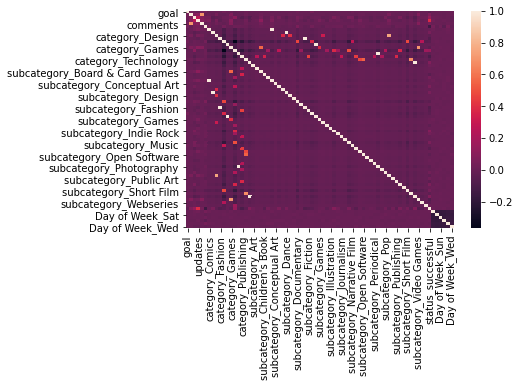

In [54]:
sns.heatmap(dummy_data.corr())
#Should I look into mutual information score or PCA


In [55]:
#Let's drop time of day and funded date because I don't know how to account for these things yet
dummy_data= dummy_data.drop(columns= ['Funded Date','Funded Time'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data.drop('status_successful', axis=1),
                                                   dummy_data['status_successful'], test_size=0.2,
                                                   random_state=200)

In [57]:
print(X_train.shape)
print(X_train)


(32480, 72)
          goal  backers  levels  updates  comments  duration  category_Comics  \
27082   2000.0       43      10        4         7     30.00                0   
17216  11000.0       23      18        6         1     42.91                0   
27629   8600.0        9       7        0         0     21.00                0   
33528    400.0        0       4        0         0      6.96                0   
16605    300.0       12       1        0         2     19.25                0   
...        ...      ...     ...      ...       ...       ...              ...   
30939   5000.0        3       2        0         0     60.04                0   
11343   8000.0        1       7        0         0     28.00                0   
784     2500.0       92       9        0         4     58.03                1   
12905   1200.0       41       5        7         1     45.04                0   
1818    1500.0       33       5        5         2     28.03                0   

       category

In [58]:
print(y_train.shape)
print(y_train)

(32480,)
27082    1
17216    0
27629    0
33528    0
16605    1
        ..
30939    0
11343    0
784      1
12905    1
1818     1
Name: status_successful, Length: 32480, dtype: uint8


In [59]:
##Apply feature scaling to the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
#Look up what these functions do
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [61]:
#Look up what these functions do
y_pred = LogReg.predict(X_test)

In [62]:
## Model Evaluation
### Classification report without cross-validation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3696
           1       0.92      0.91      0.91      4424

    accuracy                           0.91      8120
   macro avg       0.90      0.91      0.90      8120
weighted avg       0.91      0.91      0.91      8120



In [63]:
### K-fold cross-validation & confusion matrices
#calculate the prediction score for your training set
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[13090,  1492],
       [ 1526, 16372]], dtype=int64)

In [64]:
precision_score(y_train, y_train_pred)

0.9164800716524855

In [65]:
print(LogReg.coef_)
# coefficients = pd.Dataframe
print(dummy_data.columns)
column_names = dummy_data.drop('status_successful', axis=1).columns
coeff_df = pd.DataFrame(LogReg.coef_, columns = column_names)
coeff_df.head()

[[-3.25469000e+01  3.81533060e+01 -1.11184943e-01  1.20706678e+00
   4.02781040e+00 -2.86358233e-01 -3.64606999e-02  7.41057768e-02
  -9.03981922e-02 -3.85370786e-02 -9.39627396e-02 -1.38235695e-02
  -1.38589636e-01  1.60896857e-01 -1.02658877e-02 -6.48732875e-02
  -7.12166986e-02  1.15320108e-01  4.44418848e-02  8.70690093e-03
  -1.02999169e-01 -8.84659453e-02  7.13905553e-02 -3.64606999e-02
   3.50409895e-02  5.57136552e-02  1.64398377e-02  7.41057768e-02
   1.73676337e-02  5.85401247e-03  1.05585232e-01 -7.48622990e-03
  -3.85370786e-02 -5.26278909e-02  1.34276068e-01 -1.38235695e-02
   1.06460446e-02  1.70045183e-02 -6.19273790e-02  1.31002528e-02
   1.10823080e-01  4.35034060e-02  2.56317711e-02  6.64149874e-03
   4.72826882e-02  1.22707499e-01 -3.97930671e-02 -2.66587323e-02
  -3.20884818e-02  2.01984833e-02  4.93402355e-02  2.77466007e-02
  -1.02658877e-02  1.19014144e-02  2.86484710e-02 -1.41425275e-01
   4.72401492e-02 -1.54951605e-02  9.12018277e-02  1.97611437e-02
   2.74093

,goal,backers,levels,updates,comments,duration,category_Comics,category_Dance,category_Design,category_Fashion,...,subcategory_Theater,subcategory_Video Games,subcategory_Webseries,subcategory_World Music,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed
0,-32.5469,38.153306,-0.111185,1.207067,4.02781,-0.286358,-0.036461,0.074106,-0.090398,-0.038537,...,0.11532,-0.115858,0.0178,-0.005725,0.045315,0.009768,0.016155,0.007033,0.011802,0.002607


In [66]:
#Lets reshape the matrix so that it's one column and multiple rows.
coeff_df_transpose= coeff_df.transpose()
print(coeff_df_transpose)
#next step, let's sort the rows by their value

                         0
goal            -32.546900
backers          38.153306
levels           -0.111185
updates           1.207067
comments          4.027810
...                    ...
Day of Week_Sat   0.009768
Day of Week_Sun   0.016155
Day of Week_Thu   0.007033
Day of Week_Tue   0.011802
Day of Week_Wed   0.002607

[72 rows x 1 columns]


In [67]:
coeff_df_transpose= coeff_df_transpose.rename(columns={0:"Weights"}, errors="raise")
print(coeff_df_transpose)

                   Weights
goal            -32.546900
backers          38.153306
levels           -0.111185
updates           1.207067
comments          4.027810
...                    ...
Day of Week_Sat   0.009768
Day of Week_Sun   0.016155
Day of Week_Thu   0.007033
Day of Week_Tue   0.011802
Day of Week_Wed   0.002607

[72 rows x 1 columns]


In [68]:
coeff_df_transpose.sort_values('Weights')
#backers has the highest positive weight of 38,
#Comments had the positive wieght of 4,
#updates had a positive weight of 1.207
#Goal amount had a negative weight of -32.5, followed by duration at -0.2863


,Weights
goal,-32.546900
duration,-0.286358
subcategory_Product Design,-0.141425
category_Games,-0.138590
subcategory_Video Games,-0.115858
...,...
category_Music,0.160897
subcategory_Short Film,0.274094
updates,1.207067
comments,4.027810


In [69]:
#Pull out category weights
category_weights = coeff_df_transpose.filter(regex = "^category", axis=0)
category_weights.sort_values('Weights', ascending = False)
#Having the category of either Music, theater, or dance had a net positive effect,
#while everything else had a negative effect on the ability to succeed.


,Weights
category_Music,0.160897
category_Theater,0.115320
category_Dance,0.074106
category_Photography,-0.010266
category_Food,-0.013824
category_Comics,-0.036461
category_Fashion,-0.038537
category_Publishing,-0.064873
category_Technology,-0.071217
category_Design,-0.090398


In [70]:
#Pull out subcategory weights
subcategory_weights = coeff_df_transpose.filter(regex = "^subcategory", axis=0)
subcategory_weights.sort_values('Weights', ascending = False)
#Short film had the most postiive effect

,Weights
subcategory_Short Film,0.274094
subcategory_Film & Video,0.134276
subcategory_Narrative Film,0.122707
subcategory_Theater,0.115320
subcategory_Indie Rock,0.110823
subcategory_Documentary,0.105585
subcategory_Rock,0.091202
subcategory_Dance,0.074106
subcategory_Classical Music,0.071391
subcategory_Country & Folk,0.055714


In [71]:
#Lets see what we get when you pull-out category and the number of backers from our model

In [72]:
#Get dummies is function built into pandas that will create binary columns for us for categorical variables.

dummy_data = pd.get_dummies(logreg_data,columns=['subcategory','status','Day of Week'],drop_first = True)
#Let's drop time of day and funded date because I don't know how to account for these things yet
#let's also get rid of backers because of how strong of an impact it had on everything. 
#Let's get rid of category to see just how important subcategory is for this analysis
dummy_data= dummy_data.drop(columns= ['Funded Date','Funded Time',"backers",'category'])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data.drop('status_successful', axis=1),
                                                   dummy_data['status_successful'], test_size=0.2,
                                                   random_state=200)
print(X_train.shape)
print(X_train)


(32480, 59)
          goal  levels  updates  comments  duration  subcategory_Art  \
27082   2000.0      10        4         7     30.00                0   
17216  11000.0      18        6         1     42.91                0   
27629   8600.0       7        0         0     21.00                0   
33528    400.0       4        0         0      6.96                0   
16605    300.0       1        0         2     19.25                0   
...        ...     ...      ...       ...       ...              ...   
30939   5000.0       2        0         0     60.04                0   
11343   8000.0       7        0         0     28.00                0   
784     2500.0       9        0         4     58.03                0   
12905   1200.0       5        7         1     45.04                0   
1818    1500.0       5        5         2     28.03                0   

       subcategory_Art Book  subcategory_Board & Card Games  \
27082                     0                               0 

In [74]:
print(y_train.shape)
print(y_train)

(32480,)
27082    1
17216    0
27629    0
33528    0
16605    1
        ..
30939    0
11343    0
784      1
12905    1
1818     1
Name: status_successful, Length: 32480, dtype: uint8


In [75]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [76]:
## Model Evaluation
### Classification report without cross-validation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3696
           1       0.83      0.84      0.83      4424

    accuracy                           0.82      8120
   macro avg       0.82      0.82      0.82      8120
weighted avg       0.82      0.82      0.82      8120



In [77]:
### K-fold cross-validation & confusion matrices
#calculate the prediction score for your training set
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[11638,  2944],
       [ 2768, 15130]], dtype=int64)

In [78]:
precision_score(y_train, y_train_pred)

0.8371140865331416

In [79]:
#Save my coefficients into a pretty dataframe
column_names = dummy_data.drop('status_successful', axis=1).columns
no_backers_coeff_df = pd.DataFrame(LogReg.coef_, columns = column_names)
no_backers_coeff_df.head()

,goal,levels,updates,comments,duration,subcategory_Art,subcategory_Art Book,subcategory_Board & Card Games,subcategory_Children's Book,subcategory_Classical Music,...,subcategory_Theater,subcategory_Video Games,subcategory_Webseries,subcategory_World Music,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed
0,-18.894739,0.131519,2.204932,22.920283,-0.351662,0.107128,0.012056,-0.152948,-0.081055,0.160921,...,0.370984,-0.254684,0.021617,0.091502,0.035254,0.015086,0.007731,0.000024,0.010858,0.009108


In [80]:
#Transpose the dataframe to make it easier to read
no_backers_coeff_df_transpose= no_backers_coeff_df.transpose()

no_backers_coeff_df_transpose= no_backers_coeff_df_transpose.rename(columns={0:"Weights with No Backers"}, errors="raise")
no_backers_coeff_df_transpose.sort_values('Weights with No Backers')

,Weights with No Backers
goal,-18.894739
duration,-0.351662
subcategory_Video Games,-0.254684
subcategory_Board & Card Games,-0.152948
subcategory_Product Design,-0.142827
subcategory_Fiction,-0.083671
subcategory_Children's Book,-0.081055
subcategory_Fashion,-0.071356
subcategory_Technology,-0.064461
subcategory_Comics,-0.064164


In [87]:
#Let's take the weights from the training model before and after we removed # of backers and categories from the equation
#Let's see how it differs.
weight_comparison = pd.merge(coeff_df_transpose, no_backers_coeff_df_transpose, left_index= True, right_index=True)
weight_comparison.sort_values('Weights')


,Weights,Weights with No Backers
goal,-32.546900,-18.894739
duration,-0.286358,-0.351662
subcategory_Product Design,-0.141425,-0.142827
subcategory_Video Games,-0.115858,-0.254684
levels,-0.111185,0.131519
subcategory_Board & Card Games,-0.102999,-0.152948
subcategory_Children's Book,-0.088466,-0.081055
subcategory_Hip-Hop,-0.061927,-0.009828
subcategory_Technology,-0.059123,-0.064461
subcategory_Fiction,-0.052628,-0.083671
